# import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Data Collection and Pre-processing

In [3]:
data_link = "https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset"

df = pd.read_csv("heart_data.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()
#The data is cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Analysis and Visualization

In [9]:
df.age.value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

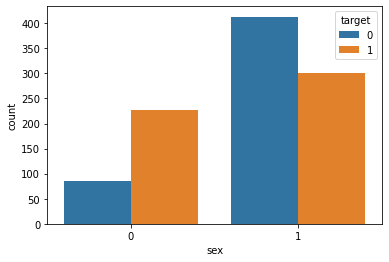

In [10]:
sns.countplot(data=df,x="sex", hue="target")

Male represents 1 

Female represents 0 

Target 0 - doesn't have heart disease

Target 1 - means have heart disease

A lot of males have heart diseases in this data.

In [11]:
df['age_classification'] = df.loc[df['age'] <= 50, ['age']]


# df['age_classification'].values > 20 == 'youth'

In [12]:
df['age_classification']= df['age_classification'].mask(df['age_classification'].values > 20,'youth')

In [13]:
df['age_classification'].unique()

array([nan, 'youth'], dtype=object)

In [14]:
df['age_classification'] = df['age_classification'].map({'NaN': 0,'youth': 1})

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_classification
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NaN
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NaN
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NaN
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NaN
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,NaN
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NaN
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,1.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1.0


In [16]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [17]:
df.trestbps.unique().max()

200

In [18]:
df.chol.unique().min()

126

In [19]:
df.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [20]:
df.thalach.unique().max()

202

In [21]:
df.oldpeak.unique().max()

6.2

In [22]:
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [32]:
df.ca.unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [33]:
df.thal.unique()

array([3, 2, 1, 0], dtype=int64)

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'age_classification'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='count'>

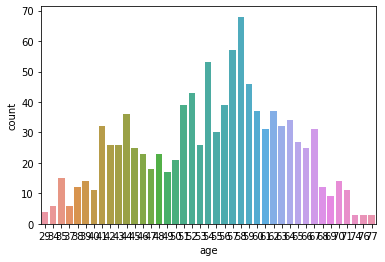

In [25]:
sns.countplot(data=df,x="age")

In [26]:
#To check if we have a balanced dataset or not
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

# Model Preparation


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [28]:
X = df.drop(columns=['target','age_classification'], axis=1)
y = df.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Model Selection

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [30]:
def compare_models():
    for model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        global accuracy
        accuracy = accuracy_score(y_test, prediction)
        print("Accuracy score of the ", model, '=', accuracy )

In [31]:
compare_models()

NameError: name 'models' is not defined

 Random ForestCLASSIFIER PROVED TO BE THE BEST

In [ ]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

# MODEL 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
           

RandomForestClassifier()

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction)

1.0

# Building a predictive System

In [ ]:
input_data = np.array([41, 0, 1, 130, 204, 0,0,0, 172,0, 1.4, 2, 0])

data = input_data.reshape(1, -1)

prediction = rf.predict(data)
print(prediction)

if (prediction[0] == 0):
    print("The person doesn't have heart disease")
else:
    print("The person has a heart disease")

In [ ]:
data = input_data.reshape(1, -1)

In [ ]:
prediction = rf.predict(data)
print(prediction)

[0]


In [ ]:
if (prediction[0] == 0):
    print("The person doesn't have heart disease")
else:
    print("The person has a heart disease")

The person doesn't have heart disease


# Save the trained Model

In [ ]:
import pickle



In [ ]:
#Load the saved model
filename = "trained_model.sav"
pickle.dump(rf, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open("trained_model.sav", 'rb'))

References
https://archive.ics.uci.edu/ml/datasets/heart+disease

https://www.sciencedirect.com/science/article/abs/pii/0002870386902656

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
